Полубаров Александр РТ5-61б.
Лабораторная работа №1.

Задание:
-Выбрать набор данных (датасет).
-Создать ноутбук, который содержит следующие разделы:
1. Текстовое описание выбранного Вами набора данных.
2. Основные характеристики датасета.
3. Визуальное исследование датасета.
4. Информация о корреляции признаков.
-Сформировать отчет и разместить его в своем репозитории на github.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('data/cwurData.csv', sep=",")

Датасет World University Rankings
https://www.kaggle.com/mylesoneill/world-university-rankings/data
Датасет описывает ранги и баллы мировых ВУЗов за 2012-2015 года в общих и частных категориях.

Колонки:
1. world_rank(int64) - Мировой ранг ВУЗа в определённый год.
2. institution(object) -Название ВУЗа
3. country(object) - Страна ВУЗа
4. national_rank(int64) - Ранг ВУЗа по стране 
5. quality_of_education(int64) - Ранг по качеству обучения
6. alumni_employment(int64) - Ранг по трудоустройству выпускников
7. quality_of_faculty(int64) - Ранг по качеству факультетов
8. publications(int64) - Ранг по публикациям
9. influence(int64) - Ранг по влиянию
10. citations(int64) - Ранг по количеству студентов 
11. broad_impact(float64) - Ранг по широкому влиянию
12. patents(int64) - Ранг по патентам
13. score(float64) - Баллы ВУЗа для определения мирового ранга
14. year(int64y) - Год ранжирования 

Целевой признак - мировой ранг.

In [3]:
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [4]:
data.shape

(2200, 14)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2200


In [6]:
data.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [7]:
data.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [8]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

world_rank - 0
institution - 0
country - 0
national_rank - 0
quality_of_education - 0
alumni_employment - 0
quality_of_faculty - 0
publications - 0
influence - 0
citations - 0
broad_impact - 200
patents - 0
score - 0
year - 0


In [9]:
data.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [10]:
data['score'].unique()

array([100.  ,  91.67,  89.5 ,  86.17,  85.21,  82.5 ,  82.34,  79.14,
        78.86,  78.55,  73.82,  73.69,  73.64,  69.49,  66.94,  66.69,
        65.76,  65.09,  64.05,  63.11,  61.74,  60.76,  60.55,  59.7 ,
        59.66,  59.  ,  58.37,  57.53,  56.43,  56.18,  55.21,  54.43,
        54.4 ,  53.72,  53.43,  53.09,  52.9 ,  52.64,  52.25,  52.15,
        51.72,  51.66,  51.6 ,  51.38,  51.06,  50.68,  50.64,  50.44,
        50.3 ,  50.29,  50.01,  49.54,  49.51,  49.1 ,  48.8 ,  48.76,
        48.5 ,  48.44,  48.43,  48.33,  48.31,  48.26,  48.15,  47.94,
        47.91,  47.74,  47.69,  47.68,  47.61,  47.59,  47.5 ,  47.31,
        46.89,  46.74,  46.38,  46.34,  46.11,  45.82,  45.7 ,  45.47,
        45.33,  45.21,  45.2 ,  45.13,  44.91,  44.71,  44.51,  44.44,
        44.32,  44.26,  44.18,  44.15,  44.13,  43.89,  43.88,  43.79,
        43.77,  43.47,  43.36,  93.94,  92.54,  91.45,  90.24,  88.21,
        85.07,  82.17,  79.16,  78.83,  77.59,  77.24,  76.99,  76.23,
      

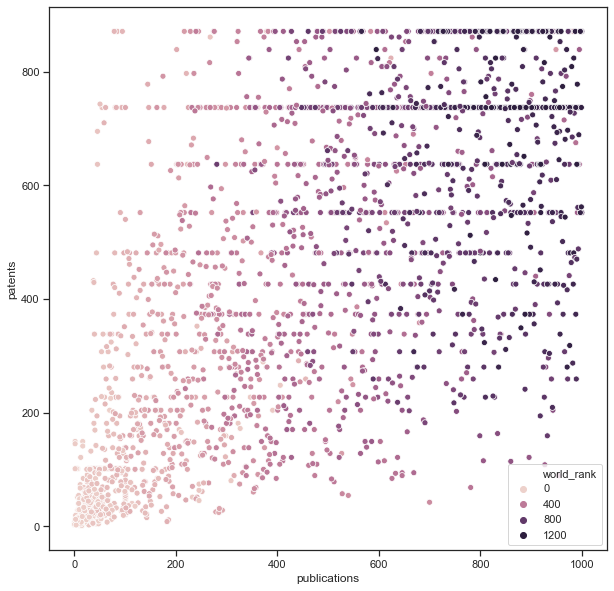

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='publications', y='patents', data=data, hue='world_rank')

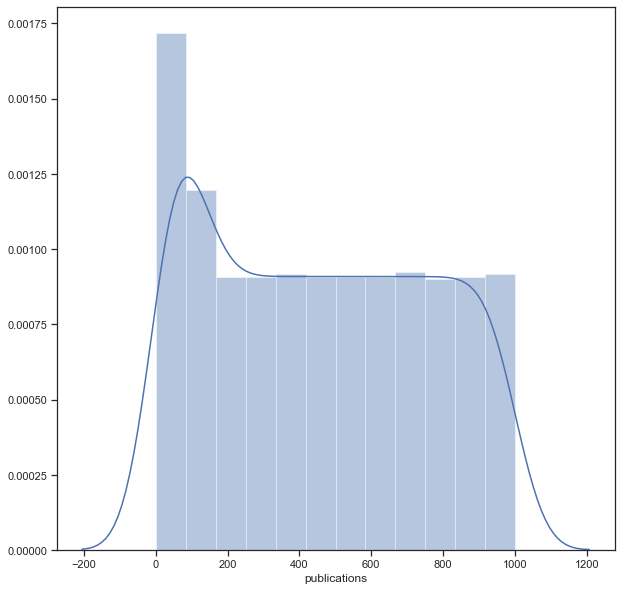

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['publications'])

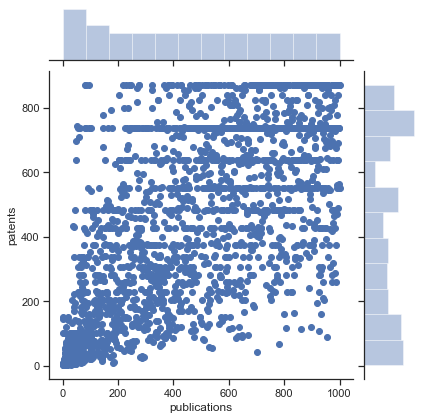

In [13]:
sns.jointplot(x='publications', y='patents', data=data)

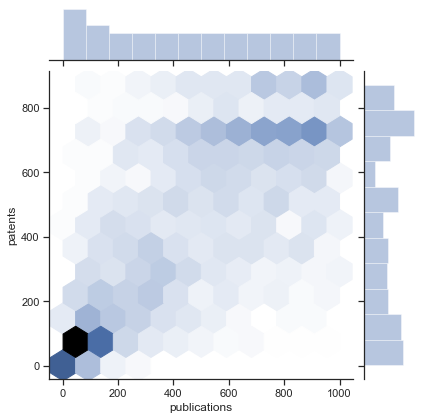

In [14]:
sns.jointplot(x='publications', y='patents', data=data, kind="hex")

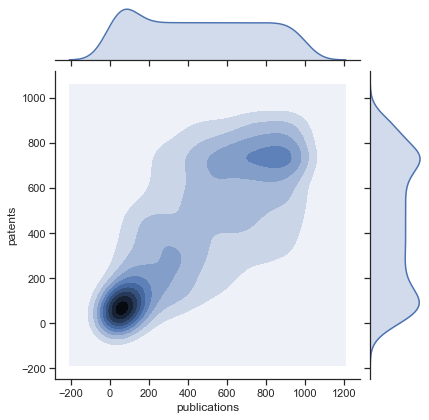

In [15]:
sns.jointplot(x='publications', y='patents', data=data, kind="kde")

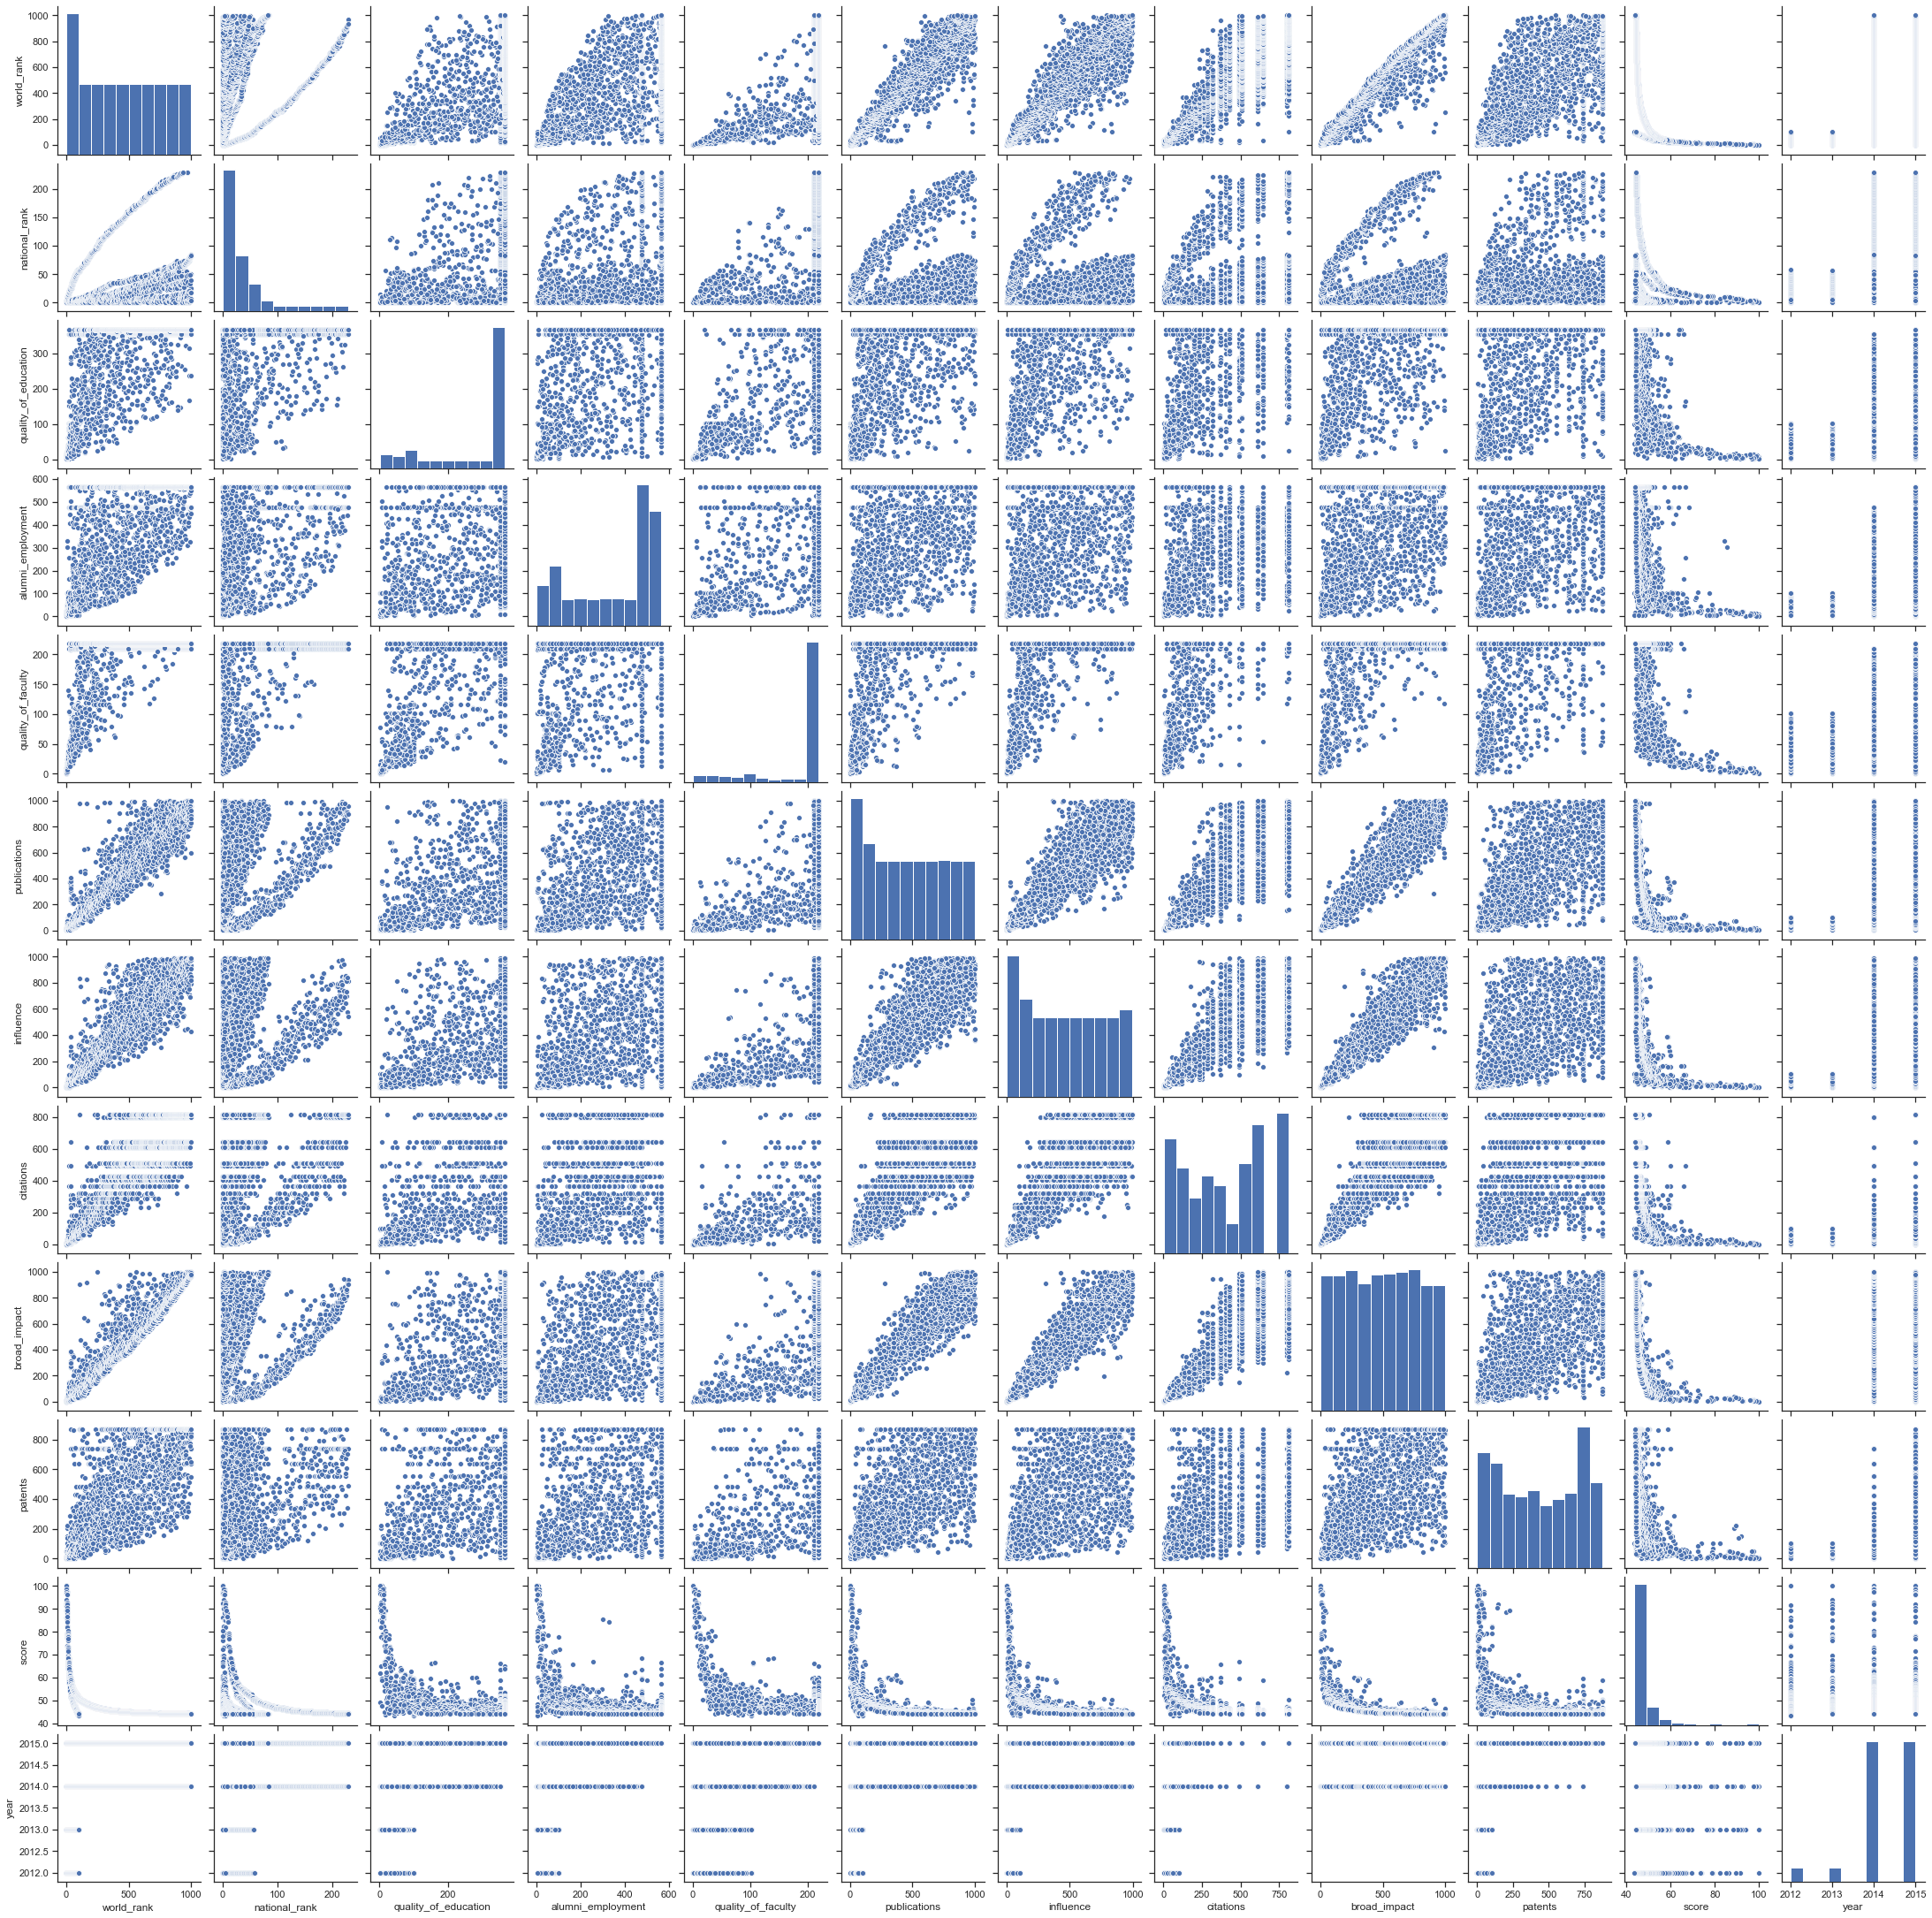

In [16]:
sns.pairplot(data)

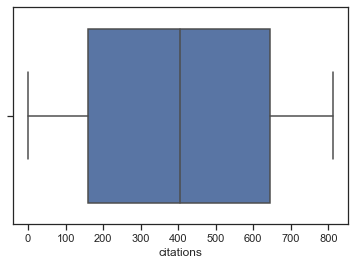

In [17]:
sns.boxplot(x=data['citations'])

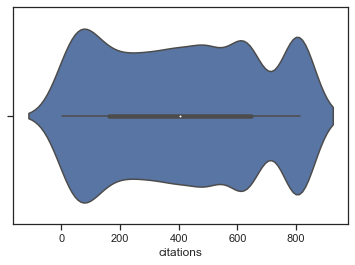

In [18]:
sns.violinplot(x=data['citations'])

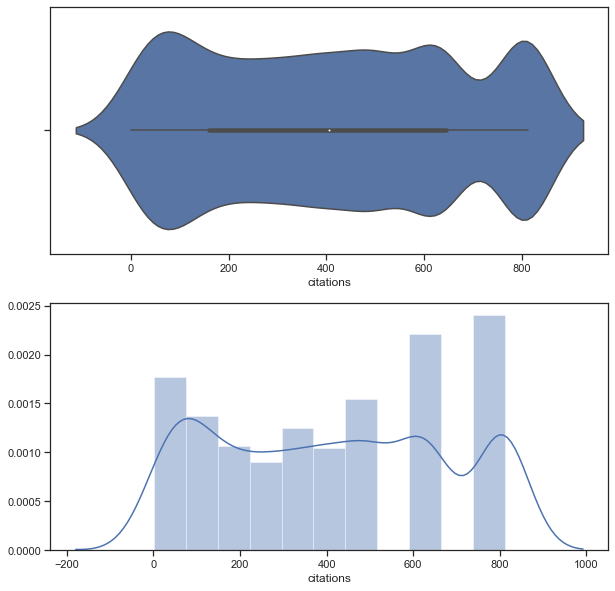

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['citations'])
sns.distplot(data['citations'], ax=ax[1])

Корреляция признаков.

Общий и частные ранги имеют крайне низкую корреляцию с общим баллом, так как общий ранг выставляется обратно пропорционально общему баллу(-0.54) и прямо пропорционально всем частным рангам(0.66-0.94).

Признаками с наименьшей корреляцией с остальными являются национальный ранг и общий балл.
Общий балл должен иметь отрицательную корреляцию, так так от большего балла ставится меньший и лучший ранг.
Национальный ранг возможно выставлялся по другим данным, поэтому ожидаемо, что он слабо коррелирует со всеми другими рангами.

In [20]:
data.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.942998,0.698214,-0.549098,0.320844
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.173043,0.159440,-0.199756,0.102951
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.521615,0.528120,-0.600541,0.427732
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.423619,0.528219,-0.510374,0.427710
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.549345,0.555107,-0.693540,0.484788
publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.917878,0.671558,-0.522111,0.318245
influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.916040,0.611811,-0.522837,0.318298
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.852638,0.598728,-0.522438,0.328771
broad_impact,0.942998,0.173043,0.521615,0.423619,0.549345,0.917878,0.916040,0.852638,1.000000,0.562861,-0.531590,-0.000124
patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.562861,1.000000,-0.474810,0.368570


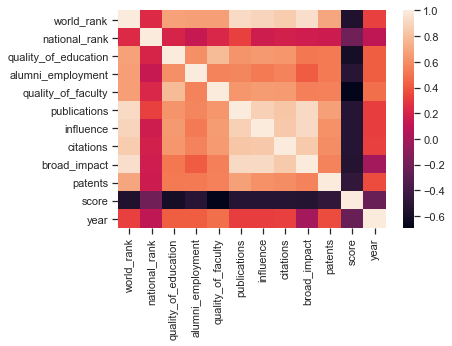

In [21]:
sns.heatmap(data.corr())